# MT2507 Mathematical Modelling: Computing Project

## Instructions

There is one helper worksheet associated with this project. You should work through this sheet before attempting the project.

The project itself is worth 15% of your final grade in the module.  There are 30 marks available.

#### Submitting your project
You should upload your work as a single *.ipynb* file to the relevant *MySaint* area as a single file by **2pm on Friday 25 March 2022** (end of Week 9).  

If you have been working on the server you will need to download the file from this server using `Download as>Notebook` in the `File` menu. The file **must** be downloaded as a Notebook. Your project must be self-contained such that it works when run in sequence (from top to bottom) by the marker.

#### Getting help
Help is available from staff in your computing lab session for each of Weeks 5-9 of the semester, excluding the February vacation.  Make sure to use these well and do not leave all your questions to Week 9 (there are only so many things we can answer in the hour!).

#### Other comments
For each question three empty cells have been added below. This is an arbitrary number and you can add or delete cells as you wish. 

Some questions have been broken down into lettered parts for clarity, but you can answer each question in the cells below the question statement (you don't need to say which corresponds to which part(s)).

## Part 1: A Single Species Population Model

In a simple model for a *biochemical switch* (needed, for example, to explain pattern formation in animal coat markings with stripes or spots) a gene $x$ is activated by an amount of a chemical substance $s$, decays at a linear rate $-rx$, and is self-stimulating by a nonlinear auto-catalytic feedback reaction, leading to an ODE
\begin{equation}
\frac{dx}{dt} = F(x) = s - r x + \frac{x^2}{1+x^2} \; ,
\label{1dode}
\end{equation}
where $s$ and $r$ are positive parameters.


### Question 1.

For this question take the parameters $s=0.01$ and $r=0.4$. The aim of this question is to locate each root of $F(x)=0$ for these parameters, using the Newton-Raphson method.

(a) Make a plot of the function $F(x)$ for suitable $x$ that allows the number of roots of $F(x)=0$ to be found, and initial guesses for each root to be chosen. 

(b) Write a function which implements the Newton-Raphson method.  

The function should have the following arguments: 
- an initial guess
- a function
- the derivative of the function
- suitable stopping condition(s) 

The function should output the following for each iteration:
- the iterate number $n$, 
- the value of $x_n$ and 
- the difference $x_n-x_{n-1}$.  

(c) Use your function of part (b) to find all positive steady states of the ODE to an accuracy of four decimal places. 
 

<div style="text-align: right"> <b> [4 Marks]</b> </div>



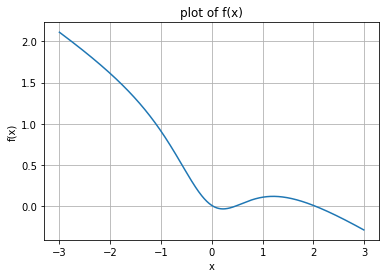

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym 
s = 0.01
r=0.4

def f(x):
    return s-r*x + (x**2)/(1+x**2)

x = np.arange(-3,3,0.01)
plt.plot(x,f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("plot of f(x)")
plt.grid(True)
    

In [2]:
x = sym.symbols(("x"))
deriv = sym.diff(f(x),x)
def dfdx(x1):
    return deriv.subs(x,x1)

#Function question asks for
def Nroot(x,f,dfdx,condition):
    difference = 1
    iterate_number = 1
    while difference > condition or difference < -condition:
        
        previous_step = x 
        
        #Newton-Raphson formula
        x = x - f(x)/dfdx(x)
        difference = x-previous_step
        
        #Required output
        print("Iterate number: ", iterate_number)
        print("Value of x: ",x)
        print("Difference xn - xn-1 :",difference)
        print("")
        iterate_number+=1

In [3]:

#To find the steady states we will need to use the newton-raphson formula
Nroot(1.5,f,dfdx,0.00001)
print("################")
Nroot(0,f,dfdx,0.00001)
print("################")
Nroot(0.5,f,dfdx,0.0001)

#Therefore positive steady states exist at x = 2.0412 , x = 0.0268 , x =0.4571  To 4 decimal places

Iterate number:  1
Value of x:  2.38214285714286
Difference xn - xn-1 : 0.882142857142856

Iterate number:  2
Value of x:  2.06589614770963
Difference xn - xn-1 : -0.316246709433227

Iterate number:  3
Value of x:  2.04125993660723
Difference xn - xn-1 : -0.0246362111023979

Iterate number:  4
Value of x:  2.04105944670497
Difference xn - xn-1 : -0.000200489902264067

Iterate number:  5
Value of x:  2.04105943313687
Difference xn - xn-1 : -1.35680973123442e-8

################
Iterate number:  1
Value of x:  0.0250000000000000
Difference xn - xn-1 : 0.0250000000000000

Iterate number:  2
Value of x:  0.0267842805883200
Difference xn - xn-1 : 0.00178428058831999

Iterate number:  3
Value of x:  0.0267934323505824
Difference xn - xn-1 : 9.15176226240835e-6

################
Iterate number:  1
Value of x:  0.458333333333333
Difference xn - xn-1 : -0.0416666666666667

Iterate number:  2
Value of x:  0.457148438496089
Difference xn - xn-1 : -0.00118489483724382

Iterate number:  3
Value of 

### Question 2

Solve the ODE of Question 1 numerically using the fourth order Runge-Kutta method for the two initial conditions 

- $x(0) = 0.45$, and 

- $x(0) = 0.5$.

In each case you should choose an appropriate time step $h$ and a suitable total number of steps so that the solution obtained allows the long time behaviour of the solution to be known.

Use the numerical solutions found to produce a plot of both solutions, with $x$ against $t$.

The result, and any subsequent explorations you choose to make, should allow you to characterise the nature of one of the steady states found in Part 1 Question 1.  Explain your finding mathematically (you are not required to provide a biological explanation).

  <div style="text-align: right"> <b> [8 Marks]</b> </div>


tn:  99.9999999999986  x:  2.0410594326023466
tn:  99.9999999999986  x:  0.026793432591414663


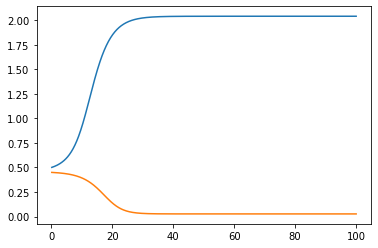

In [4]:
def RK (init_condition,f,h,steps):
    tn = 0
    x_array = []
    y_array=[]
    x = init_condition
    
    for i in range(steps):
        tn = tn +h
        x_array.append(tn)
        k1 = h*f(x)
        k2 = h*f(x + 0.5*k1)
        k3 = h*f(x + 0.5*k2)
        k4 = h*f(x+k3)
        x = x + (1/6)*(k1+(2*k2)+(2*k3)+k4)
        y_array.append(x)
    print("tn: ", tn, " x: ",x)
    plt.plot(x_array,y_array)
    
RK(0.5,f,0.1,1000)
RK(0.45,f,0.1,1000)

#The steady state at x = 0.4571 is unstable as solution curves move away from it from both sides

## Part 2: A  Modified Two-Species Population Model

Consider the system of first-order ODEs modelling two competing species $x(t)$ and $y(t)$ given by

\begin{eqnarray}
\frac{dx}{dt} & = & x( a_1 -b_1 x -c_1 \mathrm{e}^{d_1 y}),  \\
\frac{dy}{dt} & = & y( a_2 -b_2 y -c_2 \mathrm{e}^{d_2 x}) .
\end{eqnarray}

Here all coefficients are assumed to be real and positive. We also assume that $x \ge 0 $ and $y\ge 0$. 

Three of the steady states of this system of equations can be determined analytically as:

* $(x_0,y_0) =(0,0)$,


* $\displaystyle (x_0,y_0) =\left(0, 
\frac{a_2-c_2}{b_2}\right)$, assuming that $a_2 > c_2$,


* $\displaystyle (x_0,y_0) =\left( \frac{a_1-c_1}{b_1},0\right)$, 
assuming that $a_1 > c_1$.


The fourth steady state satisfies the set of equations
\begin{eqnarray}
 a_1 -b_1 x -c_1 \mathrm{e}^{d_1 y}=0, \\
a_2 -b_2 y -c_2 \mathrm{e}^{d_2 x}=0 ,
\end{eqnarray}
which can only be solved numerically.

### Question 1

Using the Newton-Raphson method for functions of two variables, write a Python code to solve for the fourth steady state numerically, using the parameter values  $a_1=b_1=a_2=b_2=1.0$, $c_1=d_1=0.1$, $c_2=0.2$ and $d_2=0.3$.  

Use your code to find the fourth steady state, to four decimal places in both $x$ and $y$.
<div style="text-align: right"> <b> [6 Marks]</b> </div>


In [5]:
y = sym.symbols("y")

def f1(x,y):
    return (1-x-0.1*sym.exp(0.1*y))
def f2(x,y):
    return (1-y-0.2*sym.exp(0.3*x))

#defining functions that will return the matrices needed for each step of the method
def jacobian_inv(x_n,y_n):
    jacobian = sym.Matrix(2,2,[-1,-0.1*y_n*sym.exp(0.1*y_n),-x_n*0.2*sym.exp(0.3*x_n),-1])
    return sym.Inverse(jacobian)    

x_n = 1
y_n = 1
def n_matrix(x_n,y_n):
    return sym.Matrix(2,1,[x_n,y_n])
def fn_matrix(x_n,y_n):
    return sym.Matrix(2,1,[f1(x_n,x_n),f2(x_n,y_n)])

#Main method loop
for i in range(5):
    new_matrix = n_matrix(x_n,y_n) - (jacobian_inv(x_n,y_n)*fn_matrix(x_n,y_n))
    x_n = new_matrix[0]
    y_n = new_matrix[1]

print("xn: ", x_n, " yn: ", y_n)
#The steady state is at x = 0.8907 y=0.7387 To 4 decimal places

xn:  0.890688854121364  yn:  0.738736061035715


### Question 2

Write a Python code to solve the system of ODEs numerically using the fourth order Runge-Kutta method, for the parameter values given in Question 1.


Use and extend this code to produce a phase plane plot. The phase plane plot should show

(a) the steady states, and

(b) plots of solutions produced using your ODE solver. 


When producing the plot choose appropriate initial conditions such that each possible type of phase space trajectory is illustrated by at least one example solution.

<div style="text-align: right"> <b> [12 Marks]</b> </div>


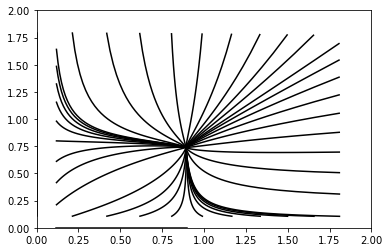

In [6]:
def f(x,y,t):
    return np.array([x*(1-x-0.1*np.exp(0.1*y)),y*(1-y-0.2*np.exp(0.3*x))])

#RK Method
def Runge_Kutta4(x,y,t,h,f):
    k1 = h*f(x,y,t)
    k2 = h*f(x +0.5*k1[0],y+0.5*k1[1],t+0.5*h)
    k3 = h*f(x+0.5*k2[0],y+0.5*k2[1],t+0.5*h)
    k4 = h*f(x+k3[0],y+k3[1],t+h)
    x = x + (1/6)*(k1[0]+(2*k2[0])+(2*k3[0])+k4[0])
    y = y +(1/6)*(k1[1]+(2*k2[1])+(2*k3[1])+k4[1])
    return [x,y]



#Function with loop applying method
def run_method(x,y,t,h,f):
    
    #Storing solutions
    x_array= []
    y_array =[]
    
    for i in range(100):
        [x,y]= Runge_Kutta4(x,y,t,h,f)
        t=t+h
        x_array.append(x)
        y_array.append(y)
    #plotting
    plt.plot(x_array,y_array,"k-")


#Plotting curves on the phase plane plot - assuming x>=0 and y>=0

plt.xlim(0,2)
plt.ylim(0,2)

x_init = 0.11
y_init = 0
for i in range(10):
    run_method(x_init,y_init,0,0.1,f)
    y_init+=0.2
x_init = 0
y_init = 0.1
for i in range(10):
    run_method(x_init,y_init,0,0.1,f)
    x_init+=0.2
x_init = 2
y_init = 0.1
for i in range(10):
    run_method(x_init,y_init,0,0.1,f)
    y_init+=0.2
x_init = 0
y_init = 2
for i in range(10):
    run_method(x_init,y_init,0,0.1,f)
    x_init+=0.2
    